## Charly Llanes

# Parameters

###   base_estimator : object, optional (default=None)
        The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is DecisionTreeClassifier(max_depth=1)
        In this case, it was set the value None(default)
  
###  n_estimators : integer, optional (default=50)
        The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.
        For this test, it was enough to set 3 estimatos of the 4, to have the best accuracy
###  learning_rate : float, optional (default=1.)
        Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.
        The accuracy change between every run, but with a value of 0.9, the accuracy goes from 0.93333 to 1
        
### algorithm : {‘SAMME’, ‘SAMME.R’}, optional (default=’SAMME.R’)
        f ‘SAMME.R’ then use the SAMME.R real boosting algorithm. base_estimator must support calculation of class probabilities. If ‘SAMME’ then use the SAMME discrete boosting algorithm. The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.
        
### random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.
        set in default

In [3]:
from sklearn import datasets
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [109]:
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    
model = AdaBoostClassifier(base_estimator=None, algorithm='SAMME.R',
                              learning_rate=0.9, n_estimators=3, random_state=None)
model.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model.predict(X_test)
    
print("\t\tMetrics classification report\n",
      metrics.classification_report(expected_y, predicted_y),
      "\n\tConfusion Matrix\n",
      metrics.confusion_matrix(expected_y, predicted_y),
      "\n\n\tAccuracy:",metrics.accuracy_score(y_test, predicted_y))  


		Metrics classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.88      1.00      0.93        14
           2       1.00      0.82      0.90        11

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.94      0.94        45
weighted avg       0.96      0.96      0.95        45
 
	Confusion Matrix
 [[20  0  0]
 [ 0 14  0]
 [ 0  2  9]] 

	Accuracy: 0.955555555556


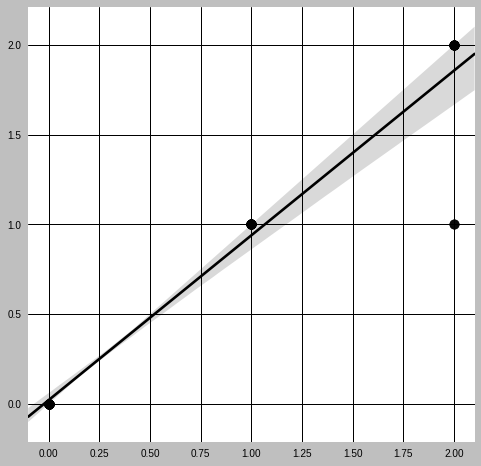

In [132]:
plt.style.use('grayscale')

plt.figure(figsize=(8,8))
sns.regplot(y_test, predicted_y, fit_reg=True, scatter_kws={"s": 100})

### Worst case

In [144]:
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    
model = AdaBoostClassifier(base_estimator=None, algorithm='SAMME',
                              learning_rate=0.1, n_estimators=1, random_state=None)
model.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model.predict(X_test)
    
print("\t\tMetrics classification report\n",
      metrics.classification_report(expected_y, predicted_y),
      "\n\tConfusion Matrix\n",
      metrics.confusion_matrix(expected_y, predicted_y),
      "\n\n\tAccuracy:",metrics.accuracy_score(y_test, predicted_y))  

		Metrics classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.00      0.00      0.00        17
           2       0.45      1.00      0.62        14

   micro avg       0.62      0.62      0.62        45
   macro avg       0.48      0.67      0.54        45
weighted avg       0.45      0.62      0.50        45
 
	Confusion Matrix
 [[14  0  0]
 [ 0  0 17]
 [ 0  0 14]] 

	Accuracy: 0.622222222222


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
